In [1]:
from utils import *
from metadata import *
from gen_imglst import * 
from vis_utils import * 
import utils
import tensorflow as tf
# utils.init_dev(utils.get_dev())
# utils.allow_growth()

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib

In [2]:
import keras
init_dev(n=(5,))
allow_growth()

Using TensorFlow backend.


In [81]:
model_path='/home/wangxinglu/prj/bd-cnn/medium_dynamic_weights/weights_medium_dynamic_cifar_10_1.h5'
model_path='/home/wangxinglu/prj/bd-cnn/medium_weights/weights_medium_cifar_10_1.h5'
model=keras.models.load_model(model_path)

In [96]:
import keras
import numpy as np
import os
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file
from keras import backend as K
model.input,model.outputs
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = x_test.astype('float32')
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

(<tf.Tensor 'input_1:0' shape=(?, 32, 32, 3) dtype=float32>,
 [<tf.Tensor 'predictions_cifar10_1/Softmax:0' shape=(?, 10) dtype=float32>])

In [99]:
begin=0
ttl=x_test.shape[0]
pred_l=[]
while begin<ttl:
    pred_l.append(K.function([model.input,K.learning_phase()],[model.outputs[-1]])([x_test[begin:begin+50],0])[0])
    begin+=50
#     if begin>500:
#         break        

In [100]:
(x_test[begin:begin+50]).shape
pred_l[0].shape

(0, 32, 32, 3)

(50, 10)

In [101]:
pred=np.concatenate(pred_l)
pred=np.argmax(pred,axis=1)
pred=pred[:10000]
pred.shape

(10000,)

In [102]:
y_test=y_test.reshape((10000,))

In [103]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, pred,np.arange(0,10)).astype(float)

In [104]:
# y_test[:5]
# pred[:5]
# plt.plot(np.sort(y_test))
# plt.plot(np.sort(pred))

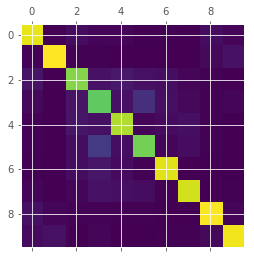

In [105]:
plt.matshow(conf)

(<matplotlib.figure.Figure at 0x7f295141e310>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f295141e9d0>)

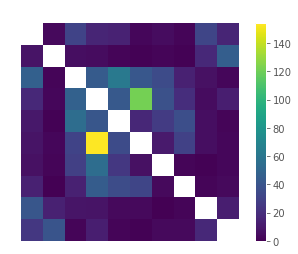

In [106]:
def matshow(angles, ax=None, fill=False):
    angles=angles.copy()
    if fill:
        np.fill_diagonal(angles, np.nan)
    if ax is None:
        fig, ax = plt.subplots()
        cax = ax.matshow(angles)
        ax.grid('off')
        ax.axis('off')
        fig.colorbar(cax)
        return fig, ax
    else:
        im = ax.matshow(angles)
        ax.axis('off')
        ax.grid('off')
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="20%", pad=.1)
        cbar = plt.colorbar(im, cax=cax)
        return ax
matshow(conf,fill=True)    

In [113]:
parent_f = {
    2: 3, 3: 5, 5: 5,
    1: 2, 7: 6, 4: 6,
    0: 0, 6: 4, 8: 1, 9: 2
}
parent_f = {
    0: 0, 1: 0, 2: 0,
    3: 1, 4: 1, 5: 1, 6: 1
}

In [114]:
pr={}
for k,v in parent_f.items():
    if v not in pr:
        pr[v]=[k]
    else:
        pr[v].append(k)

In [115]:
t2=np.zeros_like(conf)
for k,v in pr.items():
    for v1 in v:
        for v2 in v:
            t2[v1,v2]=1        

(<matplotlib.figure.Figure at 0x7f2951409b90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f295148f2d0>)

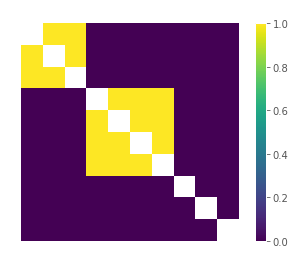

In [116]:
matshow(t2,fill=True)

In [117]:
def calc_err(conf,t2):
    conf=conf.copy()
    t2=t2.copy()
    np.fill_diagonal(conf,np.nan)
    np.fill_diagonal(t2,np.nan)
    t2_cnt=0
    t1_cnt=0
    for c,t in zip(conf.flatten(),t2.flatten()):
        if np.isnan(c): continue
        if t==1:
            t2_cnt+=c
        else:
            t1_cnt+=c
    return t1_cnt,t2_cnt
t1e,t2e=calc_err(conf,t2)
t1e/=10000.
t2e/=10000.

In [118]:
1-np.mean(y_test==pred),t1e,t2e

(0.17420000000000002, 0.1069, 0.067299999999999999)